## Pandas and Matplotlib

In [1]:
!wget https://cdn.talentsprint.com/aiml/Experiment_related_data/Week0-part_gender_height_weight.csv
!wget https://cdn.talentsprint.com/aiml/Experiment_related_data/Week0-full_gender_height_weight.csv

--2019-10-07 07:44:30--  https://cdn.talentsprint.com/aiml/Experiment_related_data/Week0-part_gender_height_weight.csv
Resolving cdn.talentsprint.com (cdn.talentsprint.com)... 172.105.34.236
Connecting to cdn.talentsprint.com (cdn.talentsprint.com)|172.105.34.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8387 (8.2K) [application/octet-stream]
Saving to: ‘Week0-part_gender_height_weight.csv’

Week0-part_gender_h 100%[===================>]   8.19K  --.-KB/s    in 0s      

2019-10-07 07:44:31 (244 MB/s) - ‘Week0-part_gender_height_weight.csv’ saved [8387/8387]

--2019-10-07 07:44:32--  https://cdn.talentsprint.com/aiml/Experiment_related_data/Week0-full_gender_height_weight.csv
Resolving cdn.talentsprint.com (cdn.talentsprint.com)... 172.105.34.236
Connecting to cdn.talentsprint.com (cdn.talentsprint.com)|172.105.34.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 418121 (408K) [application/octet-stream]
Saving to: ‘Week0-full_

In [2]:
## We take a look at the contents of the file 
## by using the shell command head
!head Week0-part_gender_height_weight.csv

"Gender","Height","Weight"
"Male",69.1798576188774,192.014335412005
"Male",66.4712752615182,172.773722928412
"Male",66.202347706273,159.390323744187
"Male",66.3162319187446,170.593858104457
"Male",73.8153856882339,231.374508117238
"Male",71.4189459863648,198.042483889936
"Male",72.001732217799,196.214414481383
"Male",67.2663627155588,192.4707695606
"Male",63.6725831540933,161.013145838894


We start by simply reading the file and storing it. But we want to skip the first line as it is a header and does not have data. We also want to store the data instead of merely printing it. But we will print the first ten items to verify that all is well.

In [0]:
PART_DATA = "Week0-part_gender_height_weight.csv"
FULL_DATA = "Week0-full_gender_height_weight.csv"

In [0]:
pd.read_csv?

In [0]:
firstLine = True
data = []
for line in open(FULL_DATA):
    if firstLine:
        firstLine = False
    else:
        data.append(line)
print(data[:10])

['"Male",73.847017017515,241.893563180437\n', '"Male",68.7819040458903,162.310472521300\n', '"Male",74.1101053917849,212.7408555565\n', '"Male",71.7309784033377,220.042470303077\n', '"Male",69.8817958611153,206.349800623871\n', '"Male",67.2530156878065,152.212155757083\n', '"Male",68.7850812516616,183.927888604031\n', '"Male",68.3485155115879,167.971110489509\n', '"Male",67.018949662883,175.92944039571\n', '"Male",63.4564939783664,156.399676387112\n']


As you can see, there are some extraneous stuff:
  1. A \n at the end of each line
  2. The double quotes around the gender
  3. Also the line is a single string separated by commas
  
We handle these issues in the next version 

In [0]:
firstLine = True
COMMA = ','
QUOTE = '"'
data = []
for line in open(PART_DATA):
    if firstLine:
        firstLine = False
    else:
        g, h, w= line.strip().split(COMMA)
        data.append([g.strip(QUOTE), float(h), float(w)])
print(data[:10])

[['Male', 69.1798576188774, 192.014335412005], ['Male', 66.4712752615182, 172.773722928412], ['Male', 66.202347706273, 159.390323744187], ['Male', 66.3162319187446, 170.593858104457], ['Male', 73.8153856882339, 231.374508117238], ['Male', 71.4189459863648, 198.042483889936], ['Male', 72.001732217799, 196.214414481383], ['Male', 67.2663627155588, 192.4707695606], ['Male', 63.6725831540933, 161.013145838894], ['Male', 71.0800835585909, 209.853553640725]]


Now we need to convert inches to cm, pounds to kg and round these to the nearest integer and we are done. Here is the final code to do the same.

In [0]:
firstLine = True
COMMA = ','
QUOTE = '"'
INCH2CM = 2.54
POUND2KG = 0.4536
data = []
for line in open(PART_DATA):
    if firstLine:
        firstLine = False
    else:
        g, h, w = line.strip().split(COMMA)
        g = g.strip(QUOTE)
        h_cm = int(float(h) * INCH2CM + 0.5)
        w_kg = int(float(w) * POUND2KG + 0.5)
        data.append([g, h_cm, w_kg])
print(data[:1])

[['Male', 176, 87]]


One reason python is popular for Scientific Computing is the availability of libraries that do a lot of standard, grunt work in a few lines. We will see how the pandas library can make short work of all the above

In [0]:
import pandas as pd
pd.read_csv(PART_DATA)

,Gender,Height,Weight
0,Male,69.179858,192.014335
1,Male,66.471275,172.773723
2,Male,66.202348,159.390324
3,Male,66.316232,170.593858
4,Male,73.815386,231.374508
5,Male,71.418946,198.042484
6,Male,72.001732,196.214414
7,Male,67.266363,192.470770
8,Male,63.672583,161.013146
9,Male,71.080084,209.853554


As you can see, pandas gives you a nice display! It figured out the column titles and numbered the data also. It actually loads the data into a dataframe, and we can treat each column as a dictionary whose key is the column name and value is the actual data in the column. Note that the datatype has been inferred too.

In [0]:
import pandas as pd
data = pd.read_csv(FULL_DATA)
type(data['Gender'][0]), type(data['Height'][1]), type(data['Weight'][30])

(str, numpy.float64, numpy.float64)

In [0]:
data['Weight']

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
5       152.212156
6       183.927889
7       167.971110
8       175.929440
9       156.399676
10      186.604926
11      213.741169
12      167.127461
13      189.446181
14      186.434168
15      172.186930
16      196.028506
17      172.883470
18      185.983958
19      182.426648
20      174.115929
21      197.731422
22      149.173566
23      228.761781
24      162.006652
25      192.343977
26      184.435174
27      206.828189
28      175.213922
29      154.342639
           ...    
9970    151.500389
9971    155.318297
9972    123.084293
9973    120.926500
9974    143.017835
9975    124.019917
9976    121.387236
9977    149.402547
9978    114.192209
9979    125.135897
9980    110.768229
9981    135.559390
9982    177.992066
9983    132.827889
9984    111.707369
9985    170.514213
9986    141.906510
9987    151.169475
9988    121.244876
9989     95.686674
9990    141.266100
9991    102.

Pandas gives you even more flexibility as part of the read_csv function. We can attach converters to selected columns. 

In [0]:
def inches2cms(s):
    return int(float(s) * 2.54 + 0.5)
def pounds2kgs(s):
    return int(float(s) * 0.4536 + 0.5)

In [0]:
pd.read_csv(FULL_DATA, converters={'Height':inches2cms, 'Weight':pounds2kgs})

,Gender,Height,Weight
0,Male,188,110
1,Male,175,74
2,Male,188,96
3,Male,182,100
4,Male,177,94
5,Male,171,69
6,Male,175,83
7,Male,174,76
8,Male,170,80
9,Male,161,71


So our final code will be

In [0]:
import pandas as pd

def inches2cms(s):
    return int(float(s) * 2.54 + 0.5)
def pounds2kgs(s):
    return int(float(s) * 0.4536 + 0.5)
data = pd.read_csv(FULL_DATA, converters={'Height':inches2cms, 'Weight':pounds2kgs})
data[:10]

,Gender,Height,Weight
0,Male,188,110
1,Male,175,74
2,Male,188,96
3,Male,182,100
4,Male,177,94
5,Male,171,69
6,Male,175,83
7,Male,174,76
8,Male,170,80
9,Male,161,71


Now it is very easy to plot the data.

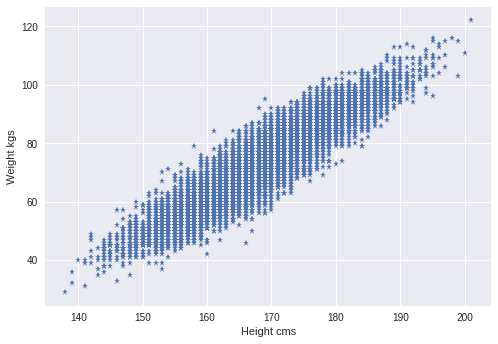

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

def inches2cms(s):
    return int(float(s) * 2.54 + 0.5)
def pounds2kgs(s):
    return int(float(s) * 0.4536 + 0.5)
data = pd.read_csv(FULL_DATA, converters={'Height':inches2cms, 'Weight':pounds2kgs})
plt.plot(data['Height'], data['Weight'], '*')
plt.xlabel("Height cms")
plt.ylabel("Weight kgs")
plt.show()

In [0]:
male = data[data.Gender == "Male"]
female = data[data.Gender == "Female"]

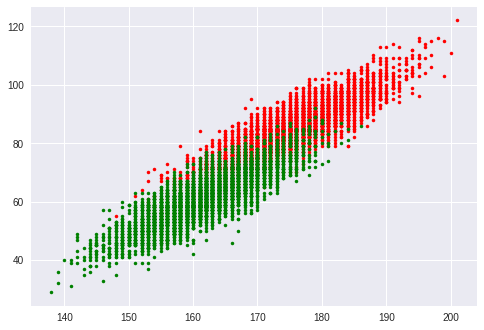

In [0]:
plt.plot(male['Height'], male['Weight'], 'r.')
plt.plot(female['Height'], female['Weight'], 'g.')
plt.show()

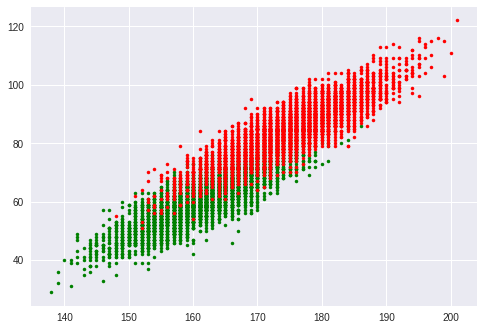

In [0]:
plt.plot(female['Height'], female['Weight'], 'g.')
plt.plot(male['Height'], male['Weight'], 'r.')
plt.show()

In [0]:
d10 = data[:10]

In [0]:
d10

,Gender,Height,Weight
0,Male,188,110
1,Male,175,74
2,Male,188,96
3,Male,182,100
4,Male,177,94
5,Male,171,69
6,Male,175,83
7,Male,174,76
8,Male,170,80
9,Male,161,71


In [0]:
d10.iloc?

In [0]:
for line in d10:
    print(line)

Gender
Height
Weight


In [0]:
for line in d10.values:
    print(line)

['Male' 188 110]
['Male' 175 74]
['Male' 188 96]
['Male' 182 100]
['Male' 177 94]
['Male' 171 69]
['Male' 175 83]
['Male' 174 76]
['Male' 170 80]
['Male' 161 71]


In [0]:
male = data[data.Gender=='Female']
male

,Gender,Height,Weight
5000,Female,150,46
5001,Female,166,64
5002,Female,161,59
5003,Female,164,58
5004,Female,157,59
5005,Female,168,71
5006,Female,160,52
5007,Female,167,75
5008,Female,157,51
5009,Female,162,47


In [0]:
d10[d10.Height ==170]

,Gender,Height,Weight
8,Male,170,80


In [0]:
heavy=data[data.Weight >115]
heavy

,Gender,Height,Weight
994,Male,198,116
1610,Male,195,116
2014,Male,201,122


In [0]:
data.drop?